<a href="https://colab.research.google.com/github/0sant1ago/NumericalExperiments_OPTIMA25/blob/main/Te_damos_la_bienvenida_a_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
from math import sin

# --- Objective Function Components ---

def f(x):
    return x**2

def grad_of_f(x):
    return 2 * x

def d(x, coeff_a, coeff_b):
    return 1 + np.sum([coeff_a[i] * (sin(coeff_b[i] * x[i])**2) for i in range(len(x))])

def grad_of_d(x, coeff_a, coeff_b):
    n = len(x)
    norm_x = norm(x)
    grad = np.zeros(n)
    for i in range(n):
        if norm_x == 0:
            grad[i] = 0
        else:
            grad[i] = coeff_a[i] * np.sin(2 * coeff_b[i] * x[i]) * coeff_b[i] / norm_x
    return grad

def h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return 0.0
    x_i = x / norm_x
    return f(norm_x) * d(x_i, coeff_a, coeff_b)

def grad_of_h(x, coeff_a, coeff_b):
    norm_x = norm(x)
    if norm_x == 0:
        return np.zeros_like(x)
    x_i = x / norm_x
    df = grad_of_f(norm_x) * (x / norm_x)  # Chain rule
    grad_d = grad_of_d(x_i, coeff_a, coeff_b)
    return df * d(x_i, coeff_a, coeff_b) + f(norm_x) * (grad_d / norm_x)

# --- Constraint function g(x) = max <a_i,x> + b_i ---

def g_i(coef, x):
    a_i = coef[:-1]
    b_i = coef[-1]
    return np.dot(a_i, x) + b_i

def g(x, coefficients_list):
    return max([g_i(coef, x) for coef in coefficients_list])

def grad_of_g(x, coefficients_list):
    # Find active constraint
    max_val = float('-inf')
    grad = None
    for coef in coefficients_list:
        val = g_i(coef, x)
        if val > max_val:
            max_val = val
            grad = coef[:-1]
    return np.array(grad)

# --- Mirror Descent with AdaGrad ---

def Alg_AdaGrad(N, epsilon, coeff_a, coeff_b, coefficients_list):
    x = np.random.randn(len(coeff_a))  # Initialize randomly
    Theta = 25
    Sum_M_i = 0
    h_values = []
    iterations = []

    for k in range(1, N+1):
        if g(x, coefficients_list) <= epsilon:
            grad_f = grad_of_h(x, coeff_a, coeff_b)
            M_k = norm(grad_f)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_f
        else:
            grad_g = grad_of_g(x, coefficients_list)
            M_k = norm(grad_g)
            Sum_M_i += M_k**2
            h_k = Theta / (np.sqrt(Sum_M_i) + 1e-8)
            x = x - h_k * grad_g

        fx = h(x, coeff_a, coeff_b)
        h_values.append(fx)
        iterations.append(k)

    return x, h_values, iterations


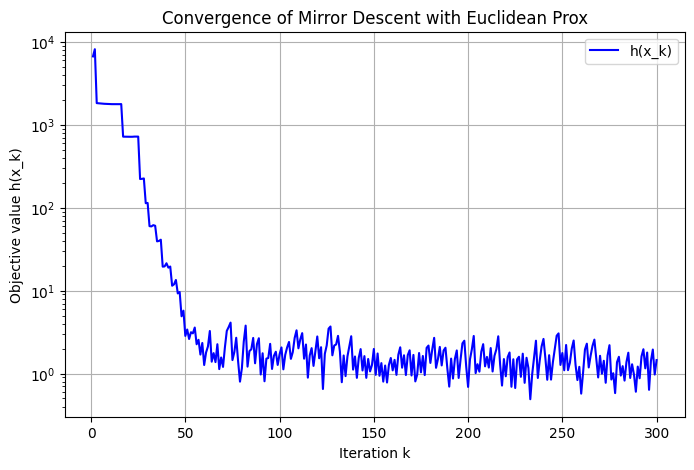

In [ ]:
# Initialize problem parameters
np.random.seed(42)
dim = 100
coeff_a = np.random.rand(dim)
coeff_b = np.random.rand(dim) * 10  # oscillation frequencies

# Linear constraint coefficients (a_i, b_i) tuples
coefficients_list = [np.append(np.random.randn(dim), np.random.randn()) for _ in range(10)]

# Run the algorithm
x_star, h_vals, iters = Alg_AdaGrad(N=300, epsilon=0.1, coeff_a=coeff_a, coeff_b=coeff_b, coefficients_list=coefficients_list)

# Plot convergence
plt.figure(figsize=(8, 5))
plt.plot(iters, h_vals, label='h(x_k)', color='blue')
plt.xlabel('Iteration k')
plt.ylabel('Objective value h(x_k)')
plt.title('Convergence of Mirror Descent with Euclidean Prox')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()
